# Численное решение нелинейных уравнений

## Setup:

In [1]:
import math
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

In [2]:
from rootisol import sturms_method as sm
from rootisol import naive_method as rinm
from rootisol import binary_and_sturms_method as ribs

from rootapprox import binary_search_method as rabsm
from rootapprox import simple_iteration_method as rasim
from rootapprox import secant_method as rasm
from rootapprox import newtons_method as ranm

import extra

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]

## Helper functions:

In [4]:
def sim_wrapper(f, a, b, eps):
    min_iters = rasim.MAX_ITERATION_COUNT
    result = None

    for k in range(-10, 11):
        iters = rasim.calculate_root(f, lambda x: 10**k, a, b, eps)
        if (not math.isnan(iters[0]) and iters[1] < min_iters):
            result = iters

        iters = rasim.calculate_root(f, lambda x: -10**k, a, b, eps)
        if (not math.isnan(iters[0]) and iters[1] < min_iters):
            result = iters

    return result

***

## Demo: отделение корней

### Пример 1: нечетные корни

In [5]:
p = Polynomial([-2, -1.5, 0.75, 0.25])

extra.latex_print(p)

<IPython.core.display.Math object>

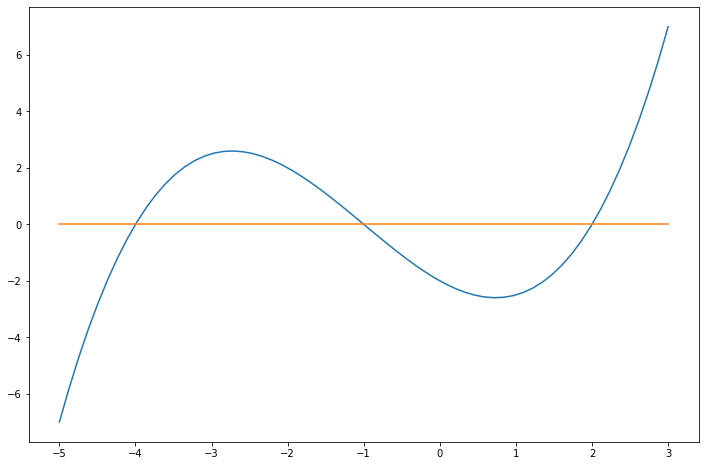

In [6]:
xs = np.linspace(-5, 3, 64)
ys = p(xs)

plt.plot(xs, ys)
plt.plot(xs, xs*0)
plt.show()

In [7]:
naive_intervals = rinm.isolate_roots(p, -5, 5, 0.001)
sturm_intervals = ribs.isolate_roots(p, -5, 5, 0.001)

print('Табличный метод:')
for (i, interval) in enumerate(naive_intervals):
    print(f'{i+1}) [{interval[0]}; {interval[1]}]')

print('\n')

print('Метод Штурма:')
for (i, interval) in enumerate(sturm_intervals):
    print(f'{i+1}) [{interval[0]}; {interval[1]}]')

Табличный метод:
1) [-4.000999999999666; -3.9999999999996665]
2) [-1.0009999999999968; -0.9999999999999968]
3) [1.9999999999998948; 2.0009999999998946]


Метод Штурма:
1) [-4.000244140625; -3.9996337890625]
2) [-1.0003662109375; -0.999755859375]
3) [1.99951171875; 2.0001220703125]


### Пример 2: четные корни

In [8]:
p = Polynomial([0, 0, -1.5, 1])

extra.latex_print(p)

<IPython.core.display.Math object>

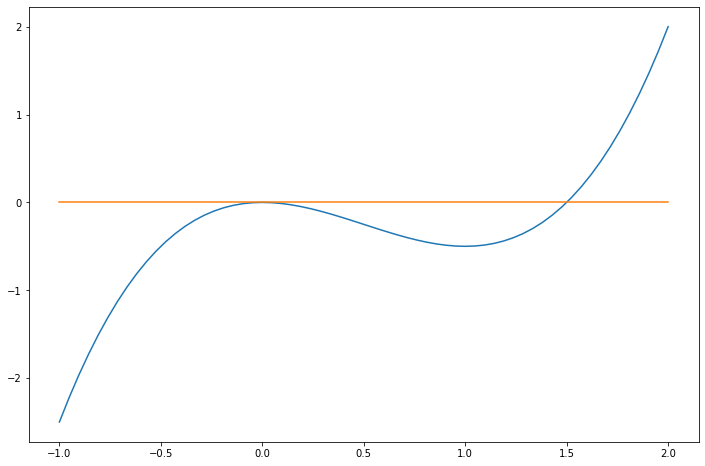

In [9]:
xs = np.linspace(-1, 2, 64)
ys = p(xs)

plt.plot(xs, ys)
plt.plot(xs, xs*0)
plt.show()

In [10]:
naive_intervals = rinm.isolate_roots(p, -5, 5, 0.001)
sturm_intervals = ribs.isolate_roots(p, -5, 5, 0.001)

print('Табличный метод:')
for (i, interval) in enumerate(naive_intervals):
    print(f'{i+1}) [{interval[0]}; {interval[1]}]')

print('\n')

print('Метод Штурма:')
for (i, interval) in enumerate(sturm_intervals):
    print(f'{i+1}) [{interval[0]}; {interval[1]}]')

Табличный метод:
1) [1.4999999999999498; 1.5009999999999497]


Метод Штурма:
1) [0.0; 0.0006103515625]
2) [1.4996337890625; 1.500244140625]


***

## Уточнение корней: сравнение скорости сходимости

### Пример из задания

In [11]:
a = -10.2374
b = -91.2105
c = 492.560

p = Polynomial([c, b, a, 1])

extra.latex_print(p)

<IPython.core.display.Math object>

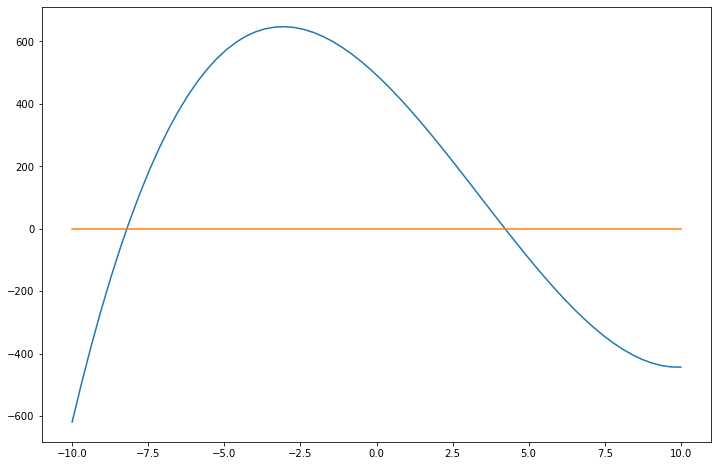

In [12]:
xs = np.linspace(-10, 10, 64)
ys = p(xs)

plt.plot(xs, ys)
plt.plot(xs, xs*0)
plt.show()

In [13]:
print(f'Метод Штурма: кол-во корней: {sm.count_roots(sm.sturms_sequence(p), -10, 10)}')

print('\n')

naive_intervals = rinm.isolate_roots(p, -10, 10, 0.01)
sturm_intervals = ribs.isolate_roots(p, -10, 10, 0.01)

print('Табличный метод:')
for (i, interval) in enumerate(naive_intervals):
    print(f'{i+1}) [{round(interval[0], 6)}; {round(interval[1], 6)}]')

print('\n')

print('Метод Штурма:')
for (i, interval) in enumerate(sturm_intervals):
    print(f'{i+1}) [{round(interval[0], 6)}; {round(interval[1], 6)}]')

Метод Штурма: кол-во корней: 2


Табличный метод:
1) [-8.21; -8.2]
2) [4.22; 4.23]


Метод Штурма:
1) [-8.203125; -8.193359]
2) [4.21875; 4.228516]


In [14]:
eps = 0.0001

print('Точность 0.0001, интервал [-9; -7]:\n')

print('Бисекция:', rabsm.calculate_root(p, -9, -7, eps))
print('Простые итерации:', sim_wrapper(p, -9, -7, eps))
print('Хорды:', rasm.calculate_root(p, -9, -7, eps))
print('Ньютон:', ranm.calculate_root(p, -9, -7, eps))

Точность 0.0001, интервал [-9; -7]:

Бисекция: (-8.202728271484375, 15)
Простые итерации: (-8.202786710661087, 28)
Хорды: (-8.202612324415886, 4)
Ньютон: (-8.202712183706781, 3)
/home/rastsislau/.local/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:756: RuntimeWarning: overflow encountered in double_scalars
  c0 = c[-i] + c0*x
/home/rastsislau/.local/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:754: RuntimeWarning: invalid value encountered in double_scalars
  c0 = c[-1] + x*0


In [15]:
p1 = -3
p2 = -12

print(f'Точность определяется как 10^k, k изменяется от {p1} до {p2}; интервал [-9; -7]:\n')

print('Бисекция: ', end='')
for k in range(p1, p2-1, -1):
    print(rabsm.calculate_root(p, -9, -7, 10**k)[1], end=', ')

print('\n')

print('Простые итерации: ', end='')
for k in range(p1, p2-1, -1):
    print(sim_wrapper(p, -9, -7, 10**k)[1], end=', ')

print('\n')

print('Хорды: ', end='')
for k in range(p1, p2-1, -1):
    print(rasm.calculate_root(p, -9, -7, 10**k)[1], end=', ')

print('\n')

print('Ньютон: ', end='')
for k in range(p1, p2-1, -1):
    print(ranm.calculate_root(p, -9, -7, 10**k)[1], end=', ')

Точность определяется как 10^k, k изменяется от -3 до -12; интервал [-9; -7]:

Бисекция: 11, 15, 18, 21, 25, 28, 31, 35, 38, 41, 

Простые итерации: 21, 28, 35, 42, 49, 56, 63, 70, 77, 85, 

Хорды: 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

Ньютон: 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 

### Закономерности

In [16]:
extra.latex_print(extra.random_poly(10))

<IPython.core.display.Math object>

In [17]:
a = -0.1
b = 0.1
sample_num = 128
norm = 1

p1 = -1
p2 = -12

bsm_avgs = []
sim_avgs = []
sm_avgs = []
nm_avgs = []

bsm_covs = []
sim_covs = []
sm_covs = []
nm_covs = []

for k in range(p1, p2-1, -1):
    eps = 10**k

    bsms = []
    sims = []
    sms = []
    nms = []

    for i in range(sample_num):
        p = extra.random_poly(norm)

        if len(ribs.isolate_roots(p, a, b, 0.01)) != 1:
            i -= 1
            continue

        try:
            bsm = rabsm.calculate_root(p, a, b, eps)
        except Exception:
            bsm = None

        try:
            sim = sim_wrapper(p, a, b, eps)
        except Exception:
            sim = None

        try:
            sm = rasm.calculate_root(p, a, b, eps)
        except Exception:
            sm = None

        try:
            nm = ranm.calculate_root(p, a, b, eps)
        except Exception:
            nm = None

        if bsm and not math.isnan(bsm[0]) and bsm[1] != rabsm.MAX_ITERATION_COUNT:
            bsms.append(bsm[1])
        if sim and not math.isnan(sim[0]) and sim[1] != rasim.MAX_ITERATION_COUNT:
            sims.append(sim[1])
        if sm:
            sms.append(sm[1])
        if nm and not math.isnan(nm[0]) and nm[1] != rasim.MAX_ITERATION_COUNT:
            nms.append(nm[1])

    bsm_avgs.append(sum(bsms) / len(bsms))
    sim_avgs.append(sum(sims) / len(sims))
    sm_avgs.append(sum(sms) / len(sms))
    nm_avgs.append(sum(nms) / len(nms))

    bsm_covs.append(len(bsms))
    sim_covs.append(len(sims))
    sm_covs.append(len(sms))
    nm_covs.append(len(nms))

/home/rastsislau/Documents/bsuir-4th-term-python-stuff/numerical_analysis_methods/solving_nonlinear_equations/rootapprox/simple_iteration_method.py:25: RuntimeWarning: overflow encountered in double_scalars
  return some_x + lambda_function(some_x)*f(some_x)


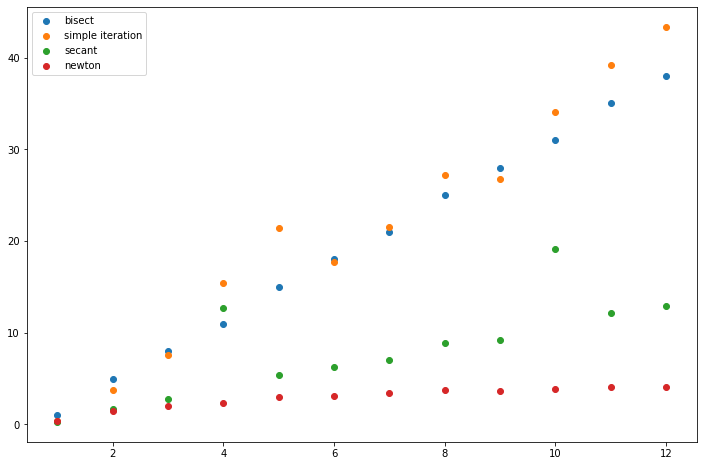

In [18]:
ks = [k for k in range(-p1, -p2+1)]

plt.scatter(ks, bsm_avgs, label='bisect')
plt.scatter(ks, sim_avgs, label='simple iteration')
plt.scatter(ks, sm_avgs, label='secant')
plt.scatter(ks, nm_avgs, label='newton')

plt.legend()
plt.show()